This notebook is part of the [Machine Learning class](https://github.com/erachelson/MLclass) by [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en).

License: CC-BY-SA-NC.

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Artificial Neural Networks</div>

1. [Biological neural networks](#sec1)
2. [Artificial neural networks](#sec2)
3. [Propagating values through a network](#sec3)
3. [Learning the weights of a neural network (regression case)](#sec4)
4. [Neural networks for classification](#sec5)

# 1. <a id="sec1"></a> Biological neural networks

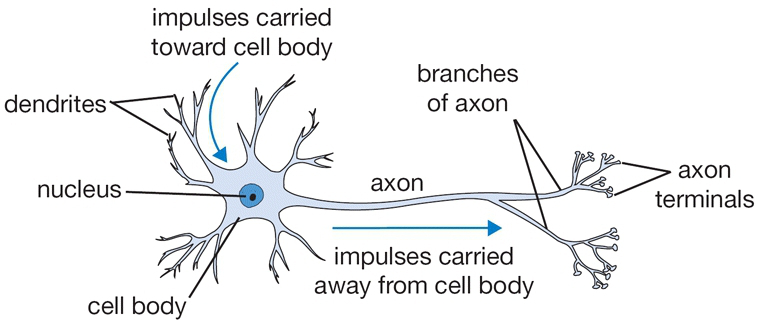

- dendrites $\rightarrow$ nucleus $\rightarrow$ axon $\rightarrow$ synapses.
- electrical impulses.
- chemical neuro-transmitters.

1839: "Living bodies tissues are made of cells"... maybe expect for the nervous system.<br>
1888: first observation of a nerve cell

# 2. <a id="sec2"></a>Artificial neural networks

**The idea:**
1. Each neuron processes a bit of information and passes it to its children.
2. Overall the network processes raw information into general concepts.

**Question:** can we mimic this system of connections in a learning system that adapts its parameters to the data it is exposed to?

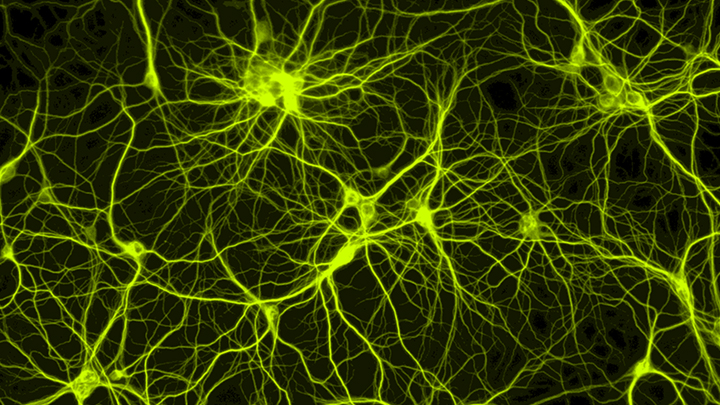

**A formal neuron:**
$$z = \sigma(w^T x + b)$$
- $x$ is the input (the $n$ dimensional signal received through dendrites)
- $w$ is an $n$-dimensional vector of weights that give more or less importance to the elements of $x$
- $b$ is a scalar bias
- $\sigma$ is the neuron's activation function
- $z$ is the output (the signal along the "axon")

Note that the formal neuron is a *function*, very different from the impulses carried by axons in biological neurons.

**Computation graph**

A neural network is obtained by connecting some neuron's outputs to other neurons inputs. The goal of such a network is typically to learn how to imitate a certain function $f(x)$ for which we are given training data pairs $(x,y)$ with $y = f(x) + \textrm{noise}$. Such a network has thus three types of neurons:
- Input neurons. Those correspond to the different input variables $x_i$ describing our training examples.
- Output neurons. Those correspond to the targets $y$ in our examples.
- Hidden neurons. Any neurons that's not an input or an output neuron.

Therefore, a neural network is a computation graph, with inputs $x$ and outputs $y$, where nodes are neurons and edges connect the output signal of a node to one of the inputs of another.

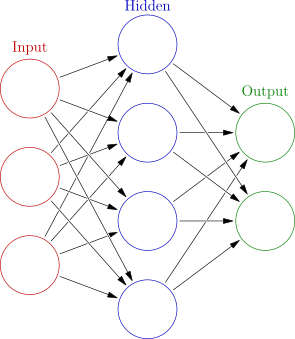

**A little vocabulary:**
- A neural network is a computation graph.
- The input layer is composed of all input neurons.
- A layer is a (maximum) set of unconnected neurons, at the same depth from the input layer.
- The output layer is composed of all output neurons.
- All layers between the input and output layers are called hidden layers.
- A neural network organized in layers is called a feedforward NN.
- Some neural networks are not feedforward NNs and present loops. They are called Recurrent NN.
- A multilayer NN is often called a multilayer perceptron (for historical reasons)
- The output of a neuron is also called its activation.
- The vector of outputs for all neurons in a given layer is called the layer's activation.

**A bit of history:**<br>
1943: McCulloch (neurophysiologist) and Pitts (logician) suggest a first formal model for neurons.<br>
1949: Hebb suggests dendrites are strengthened whenever they are used.<br>
1951: Minsky designs a network of artificial neurons.<br>
1958: Roseblatt designs the Perceptron, with step activation functions.<br>
1962: Widrow and Hoff suggest the delta-rule for adapting a network weights to obtain the desired output.<br>
1970s and 80s: The "quiet years". Attention turns to other methods while computing resources slowly increase.<br>
1986: Rediscovery of the backpropagation algorithm.<br>
2000s: computing power + available data allow the training of deep multi-layered architectures (deep learning). Massive successes.

<div class="alert alert-success"> Feedforward neural networks are computational graphs where edges convey scalar values between neurons (nodes).<br>
A neuron's output results from the application of the activation function $\sigma$ to a linear combination of its inputs $z = \sigma(w^T x + b)$.<br>
The network parameters are all the neuron's input weights and biases. <br>
A neural network is a function that transforms its inputs into outputs by value propagation in the network.<br>
Learning a neural network consists in finding the $w$ and $b$ such that the network's output matches the function $f(x)$ that generated the data pairs $(x,y = f(x)\textrm{+noise})$.
</div>

**Universal approximation theorem:**<br>
If $\sigma$ is "S-shaped", then with enough neurons, a single layer, feed-forward NN can approximate any continuous function to an arbitrary precision.<br>
In other words, NN are universal approximators.

**Activation functions**
- step
$$\sigma(x) = 0 \textrm{ if }x<0\textrm{, }1\textrm{otherwise}$$
- linear
$$\sigma(x) = x$$
- sigmoid or logistic (which we will consider by default for now)
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
- hyperbolic tangent
$$\sigma(x) = \frac{e^{x} + e^{-x}}{e^{x} - e^{-x}}$$
- radial basis function (useful in some specific cases like Kohonen maps)
$$\sigma(x) = e^{-x^2}$$

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1./(1. + np.exp(-x))

XX = np.arange(-5,5.,0.1)
plt.plot(XX,sigmoid(XX));

# <a id="sec3"></a>3. Propagating values through a network

Let's define a neural network that has the following structure:
- 2 input neurons
- first hidden layer with 4 sigmoid neurons
- second hidden layer with 3 sigmoid neurons
- one ouput layer with an identity neuron

Let's initialize it's weights randomly (following a $\mathcal{N}(0,1)$ distribution).

In [ ]:
sizes = [2,4,3,1]
num_layers = len(sizes)
biases = [np.random.randn(y) for y in sizes[1:]]
weights = [np.random.randn(out,inp) for inp,out in zip(sizes[:-1],sizes[1:])]

def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

<div class="alert alert-warning">**Exercice:**<br>
Write a function that computes the forward propagation of the input $x=[1,2]$ through the network and returns the outputs and all intermediate activations.
</div>

In [ ]:
input_value = np.array([[1,2]])

def forward_pass(x, verbose=False):
    z = [np.zeros((x.shape[0], sz)) for sz in sizes]
    y = [np.zeros((x.shape[0], sz)) for sz in sizes]
    z[0] = x.copy()
    for i in range(1,len(sizes)):
        if verbose:
            print("# Forward propagation to layer", i)
        y[i] = np.dot(z[i-1],weights[i-1].T) + biases[i-1]
        if verbose:
            print("Neuron inputs:", y[i])
        if i==len(sizes)-1:
            z[i] = y[i]
        else:
            z[i] = sigmoid(y[i])
        if verbose:
            print("Layer outputs:", z[i])
    return y,z

y,z = forward_pass(input_value, verbose=True)

# 4. <a id="sec4"></a> Learning the weights of a neural network (regression case)

Suppose that the value associated to $x=[1,2]$ in the previous example was $12.3$. That is not what was predicted and we could wish to adapt the weights of the network so that the next time we propagate $x=[1,2]$ through the network, the prediction is closer to $12.3$.

Let's do a bit of math to formalize the search for the best neural network for our data.

Let's first suppose that our data points $(x,y)$ are drawn from a probability distribution $p(x,y)$.

## 4.1 Loss function

After all, a neural network with a fixed graph structure is a parametric function $f_\theta$ where $\theta$ is the vector of all parameters (all weights and biases). Learning a neural network that correctly predicts $y$ corresponds to finding the parameters $\theta$ that minimize the following function.
$$L(\theta) = \displaystyle \mathbb{E}_{(x,y)\sim p(x,y)} \left[ \left(f_\theta(x) - y\right)^2 \right] = \int_{x,y} \left[ \left(f_\theta(x) - y\right)^2 \right] \mathrm{d}p(x,y) $$

This is what we shall call the *loss function*. The smaller $L(\theta)$, the happier we are.

Note that we have defined $L(\theta)$ as a least squares minimization problem and that other loss functions could be relevant for certain problems.

<div class="alert alert-warning">**Exercice:**<br>
Using the training data provided below, estimate the loss function for the current parameters $\theta$ of the network defined in the previous section.
</div>

In [ ]:
X = np.array([[1.,2.],[1.1,1.7],[0.8,1.9]])
def func(x):
    return np.sqrt(x[:,0]+x[:,1])
y = func(X)

ypred,zpred = forward_pass(X, verbose=True)
pred = zpred[-1]
err = np.mean((pred-y)**2)
print("Loss function estimate:",err)

## 4.2 Stochastic gradient descent

Let's say we have an initial guess $\theta_0$ for the parameters of $f_\theta$. How can we change this guess so that we minimize $L(\theta)$? Plain gradient descent tells us we should move in the opposite direction of the gradient of $L(\theta)$ with respect to $\theta$. So let's write this gradient:

\begin{align*}
\displaystyle \nabla_\theta L(\theta) &= \nabla_\theta \left[ \mathbb{E}_{(x,y)\sim p(x,y)} \left[ \left(f_\theta(x) - y\right)^2 \right] \right]\\
&= \mathbb{E}_{(x,y)\sim p(x,y)} \left[ \nabla_\theta \left[ \left(f_\theta(x) - y\right)^2 \right] \right]\\
&= \mathbb{E}_{(x,y)\sim p(x,y)} \left[ 2 \left(f_\theta(x) - y\right) \nabla_\theta f_\theta(x) \right]
\end{align*}

So, the gradient of $L(\theta)$ is the expectation of $2 \left(f_\theta(x) - y\right) \nabla_\theta f_\theta(x)$. In other words:

$$\nabla_\theta L(\theta) = \int_{x,y} 2 \left(f_\theta(x) - y\right) \nabla_\theta f_\theta(x) \mathrm{d}p(x,y)$$

The problem with this expression is that it requires the knowledge of $p(x,y)$ for all possible $(x,y)$ pairs. That would mean having an infinite amount of data. We can, however, try to approximate this gradient with a finite data set $\left\{\left(x_i,y_i\right)\right\}_{i\in [1,N]}$:
$$\nabla_\theta L(\theta) \approx \sum_{i=1}^N 2 \left(f_\theta(x_i) - y_i\right) \nabla_\theta f_\theta(x_i)$$

This is actually a *noisy estimation of the gradient* (that converges to the true gradient in the limit of infinite sampling). The theory of *stochastic gradient descent* tells us that if $g(\theta)$ is a noisy estimator of $\nabla_\theta L(\theta)$, then the follwing sequence $\theta^k$ converges to a local minimum of $L(\theta)$:
$$\theta_{k+1} = \theta_k - \alpha_k g(\theta_k)$$
Under the condition that $\sum \alpha_k = \infty$ and $\sum \alpha_k^2 < \infty$ (called the Robbins-Monro conditions).

**A Stochastic Approximation Method**.
H. Robbins and S. Monro (1951). *The Annals of Mathematical Statistics*. **22**(3): 400. 

The first condition $\sum \alpha_k = \infty$ insures that whatever the starting parameters $\theta_0$, no matter how far from $\theta_0$ the minimum is, this procedure can reach it.

The second condition $\sum \alpha_k^2 < \infty$ forces the step sizes to be a decreasing sequence and avoids oscillations around the minimum.

Here we have
$$g(\theta) = \sum_{i=1}^N 2 \left(f_\theta(x_i) - y_i\right) \nabla_\theta f_\theta(x_i)$$

To simplify the notation we shall write $\alpha$ instead of $\alpha_k$.

One complete pass over the training set will be called a *training epoch*.

## 4.3 Minibatches

Notation disambiguation: $\theta_k$ refers to the $k$th parameter vector in the sequence above, $\theta_j$ refers to the $j$th component of vector $\theta$.

Now we have a procedure that allows to find some optimal weights for our network. Provided that, for all parameter $\theta_j$ in the parameter vector $\theta$, we can compute $\frac{\partial f_\theta}{\partial \theta_j}(x)$, then we can calculate:
$$g_{j}(\theta) = \sum_{i=1}^N 2 \left(f_{\theta}(x_i) - y_i\right) \frac{\partial f_{\theta}}{\partial\theta_j}(x_i)$$
And thus we can update $\theta_j$ with:
$$\theta_j \leftarrow \theta_j - \alpha g_{j}(\theta)$$

So the computation of all the components in $g(\theta)$ and the update of each element in $\theta$ can be done in *parallel*.

It appears, however, that for large datasets, summing over the $N$ elements is computationaly expensive. So we could define a cheaper (but noiser) version of the gradient by summing only over a random subset of $n$ training points ($n \ll N$): 
$$\nabla_\theta L(\theta) \approx g(\theta) = \sum_{i=1}^n 2 \left(f_\theta(x_i) - y_i\right) \nabla_\theta f_\theta(x_i) $$

Such a subset is called a *minibatch*. When $n=1$, the gradient estimate is based on a single example and is thus very (very!) noisy and convergence can be very slow and unstable. When $n\rightarrow N$ the noise level decreases at the expense of a heavier computational cost. In practice, the noise level decreases quickly enough that we can take $n\in [50;1000]$ in most cases.

# 4.4 Recursive gradient computation

For the update above to be feasible, we need to have a differentiable $f_\theta$. Let's take a close look at the gradient $\nabla_\theta f_\theta(x)$ and write it as:
\begin{align*}
\nabla_\theta f_\theta(x) &= \left[ \begin{array}{c} \vdots \\ \frac{\partial f_\theta}{\partial\theta_j}(x) \\ \vdots \end{array}\right]
\end{align*}

In the case of a neural network, the $\theta_j$ are weights and biases. Let's consider neuron number $j$ and let's write $w_{ij}$ its input weights (with the convention that $i=0$ corresponds to the bias). We will write:
- $x_{ij}$ the $i$th input to this neuron
- $y_j = \sum_i w_{ij} x_{ij}$ the scalar input to the activation function
- $z_j = \sigma (y_j)$ the neuron's output
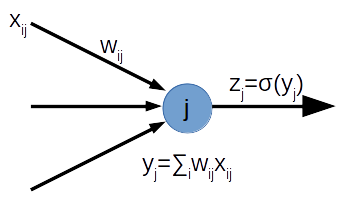</img>

These three quantities have been computed during the *forward pass*, when $x$ was propagated through the network to obtain $f_\theta(x)$.

Then, using the chain rule, we can write:
$$\frac{\partial f_\theta}{\partial w_{ij}}(x) = \frac{\partial f_\theta}{\partial z_j}(x) \frac{\partial z_j}{\partial y_j}(x) \frac{\partial y_j}{\partial w_{ij}}(x)$$

Let's decompose this expression. First we take the last (third) term. We have $y_j = \sum_i w_{ij} x_{ij}$, so:
$$\frac{\partial y_j}{\partial w_{ij}}(x) = x_{ij}$$

Then we take the second term. We have $z_j = \sigma(y_j)$, so:
$$\frac{\partial z_j}{\partial y_j}(x) = \sigma'(y_j)$$

Only the first term remains. Let's assume $j$ is an output neuron. In this case, $z_j$ is the $j$th component of $f_\theta(x)$, and we have:
$$\frac{\partial f_\theta}{\partial z_j}(x) = 1$$

Consequently, for the neurons of the output layer:
$$\frac{\partial f_\theta}{\partial w_{ij}}(x) = \sigma'(y_j) x_{ij}$$

And hence, the update of the input weights $w_{ij}$ for output neuron $j$ (in the output layer) is:
$$w_{ij} \leftarrow w_{ij} - \alpha \left(f_\theta(x) - y\right)\sigma'(y_j) x_{ij}$$

Now let's look at the neurons of the layer just preceding the output layer. Let's call $L_j$ the set of indices of the neurons that directly feed on neuron $j$'s output. $z_j$ corresponds to the $x_{jl}$ variable for these neurons. So, we can write:
$$\frac{\partial f_\theta}{\partial z_j}(x) = \sum_{l \in L_j} \frac{\partial f_\theta}{\partial z_l}(x) \frac{\partial z_l}{\partial y_l}(x) \frac{\partial y_l}{\partial z_j}(x)$$

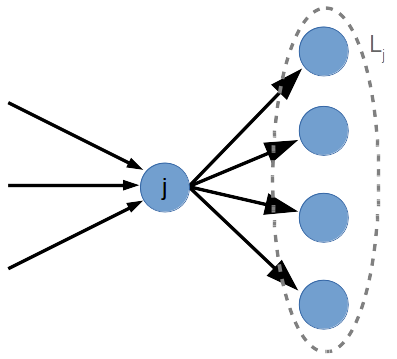</img>

As previously:
$$\frac{\partial z_l}{\partial y_l}(x) = \sigma'(y_j)\textrm{ and }\frac{\partial y_l}{\partial z_j}(x) = w_{jl}$$

So this total derivative turns into:
$$\frac{\partial f_\theta}{\partial z_j}(x) = \sum_{l \in L_j} \frac{\partial f_\theta}{\partial z_l}(x) \sigma'(y_l) w_{jl}$$

This provides a recurrence relation between $\displaystyle \frac{\partial f_\theta}{\partial z_j}(x)$ and $\displaystyle \frac{\partial f_\theta}{\partial z_l}(x)$ for $l \in L_j$.

Let's write $\displaystyle  \delta_j = \frac{\partial f_\theta}{\partial z_j}(x) \sigma'(y_j)$. Then we have the following recurrence equation between neuron $j$ and its siblings in $L_j$:
$$\delta_j = \sigma'(y_j)\sum_{l\in L_j} \delta_l w_{jl}$$

And the gradient of $f_\theta$ with respect to $w_{ij}$ is:
$$\frac{\partial f_\theta}{\partial w_{ij}}(x) = \delta_j x_{ij}$$

In particular, for output neurons:
$$\delta_j = \frac{\partial f_\theta}{\partial z_j}(x) \sigma'(y_j) = \sigma'(y_j)$$

## 4.5 Backpropagation

If neuron $j$ is an output neuron, then $z_j$ is the $j$th component of $f_\theta(x)$. So $ \frac{\partial f_\theta}{\partial z_j}(x) = 1$. Consequently, for those neurons:
$$\frac{\partial f_\theta}{\partial w_{ij}}(x) = \sigma'(y_j) x_{ij}$$

And hence, the update of the input weights $w_{ij}$ for output neuron $j$ is:
$$w_{ij} \leftarrow w_{ij} - \alpha \left(f_\theta(x) - y\right)\sigma'(y_j) x_{ij}$$

We have, for those output neurons:
$$\delta_j = \frac{\partial f_\theta}{\partial z_j}(x) \sigma'(y_j) = \sigma'(y_j)$$

Recursively, once all the $\delta_j$ for the output layer have been computed, we can compute the $\delta_j$ for the last hidden layer as:
$$\delta_j = \sigma'(y_j) \sum_{l\in L_j} \delta_l w_{jl}$$

And since $\frac{\partial f_\theta}{\partial w_{ij}}(x) = \delta_j x_{ij}$, the input weights of neuron $j$ can be updated as:
$$w_{ij} \leftarrow w_{ij} - \alpha \left(f_\theta(x) - y\right) \delta_j x_{ij}$$

Once, all these weights have been updated and all the $\delta_j$ have been computed for the corresponding neurons, we can move one layer back in the network, and so on until we reach the input layer.

This algorithm is called *Backpropagation* of the gradient.

<div class="alert alert-success">
The backpropagation algorithm allows to update the networks weights.<br>

**Forward pass:**
<ol style="list-style-type:none">
<li> Input $x$
<li> $\lambda=$input layer
<li> While $\lambda\neq$ output layer:
    <ol style="list-style-type:none">
    <li>For $j$ in $\lambda$:
        <ol  style="list-style-type:none"><li>Compute $y_j$ and $z_j=\sigma(y_j)$</ol>
    <li> $\lambda=$ next layer
    </ol>
<li> Output $f_\theta(x)$
</ol>

**Backpropagation:**
<ol style="list-style-type:none">
<li> Output difference $\Delta = f_\theta(x) - y$
<li> For $j$ in ouput layer $\delta_j = \sigma'(y_j)$
<li> $\lambda =$ output layer
<li> While layer $\lambda \neq$ input layer:
    <ol style="list-style-type:none">
    <li> For $j$ in $\lambda$:
        <ol style="list-style-type:none">
        <li>Compute $\delta_j = \sigma'(y_j) \sum_{l\in L} \delta_l w_{jl}$ (only if not output layer)
        <li>Update $w_{ij} \leftarrow w_{ij} - \alpha \Delta \delta_j x_{ij}$</ol>
    <li> $\lambda=$previous layer
    </ol>
</ol>
</div>

<div class="alert alert-warning">**Exercice:**<br>
Write a backpropagation pass for a given minibatch on the network defined before.
</div>

In [ ]:
# No correction for that part yet!

Let's train our first neural network with scikit-learn.

In [ ]:
def func(x):
    return x*np.sin(x)

sigma_noise = 0.3
def observation(x):
    return func(x) + np.random.normal(0,sigma_noise,x.shape[0])

X = np.linspace(-5,10,1000)
N = X.shape[0]
Y = observation(X)
x = np.linspace(-5,10,100)

fig=plt.figure(figsize=(7,7), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(X, Y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, func(x), 'b', label=u'$f(x) = x\,\sin(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-6, 10)
plt.legend(loc='upper left');

In [ ]:
from sklearn.neural_network import MLPRegressor

myNN = MLPRegressor(hidden_layer_sizes=(10,5), activation='logistic', solver='sgd')
#myNN = MLPRegressor(hidden_layer_sizes=(100,10), activation='logistic')

In [ ]:
X=X.reshape(-1,1)

for i in range(10):
    myNN.fit(X,Y)
    print('*',end='')

In [ ]:
ypredict = myNN.predict(X)

fig=plt.figure(figsize=(10,10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(X.ravel(), Y.ravel(), 'r.', markersize=10, label=u'Observations')
plt.plot(x, func(x), 'b', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, ypredict, 'g', label=u'$f(x) = NN(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-6, 10)
plt.legend(loc='upper left');

A bit unconvincing. We are going to focus on the classification case and will use the keras API in the next part of this class, but this first example serves as a warning. Although appealing for their many good properties (trainable online, scalable to large datasets and dimensions, versatile), neural networks can be hard to tune and are prone to overfitting (or underfitting) if nothing is done to prevent it.

# 5. <a id="sec5"></a>Neural networks for classification

The derivation we have written above can be repeated for other loss functions. In particular, for classification tasks, if one has $K$ classes with $p_k$ the target classes probabilities for input $x$, the cross-entropy loss fonction is commonly used in classification:
$$L(\theta) = \sum_{k=1}^K p_k \log f_\theta(x)$$

Scikit-learn offers an easy API for classification as illustrated below, but its flexibility remains limited and Keras offers a great API that we shall use in the next part of this class.

In [ ]:
from sys import path
path.append('../2 - Text data preprocessing')
import load_spam
spam_data = load_spam.spam_data_loader()
spam_data.load_data()

Xtrain, ytrain, Xtest, ytest = spam_data.split(2000)

In [ ]:
from sklearn.neural_network import MLPClassifier

myNN = MLPClassifier(hidden_layer_sizes=(25))
myNN.fit(Xtrain, ytrain)

In [ ]:
myNN.score(Xtest,ytest)

The classification accuracy is already excellent.